### Ussen Qarlygash


### Задача прогнозирования — определить, зарабатывает ли человек более 50 тысяч в год.

### Step 1: Import Necessary Libraries

In [1]:
# Importing related Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


### Step 2: Load the Dataset
The Iris dataset is readily available in scikit-learn's dataset library.

In [2]:
file_path = 'adult.data'
df = pd.read_csv(file_path, header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], skipinitialspace=True)


In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Cleaning the data

In [7]:
df = df.drop('workclass', axis=1,)
df = df.drop('occupation', axis=1,)
df = df.drop('native-country', axis=1,)
df = df.drop('education', axis=1,)

In [8]:
df.dtypes

age                int64
fnlwgt             int64
education-num      int64
maritalstatus     object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
income            object
dtype: object

In [10]:
# df['education'].describe()

In [12]:
# категориальныйларды бинарныйга ауыстыру
# df["education"].unique()

In [14]:
# df.education.replace(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
#        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
#        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], inplace=True)

In [15]:
df["maritalstatus"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [16]:
df.maritalstatus.replace(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [17]:
df["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [18]:
df.relationship.replace(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], [1, 2, 3, 4, 5, 6], inplace=True)

In [19]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [20]:
df.race.replace(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], [1, 2, 3, 4, 5], inplace=True)

In [21]:
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df.sex.replace(['Male', 'Female'], [1,0], inplace=True)

In [23]:
df.income.replace(['>50K', '<=50K'], [1,0], inplace=True)

In [24]:
df.describe()

,age,fnlwgt,education-num,maritalstatus,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,2.083781,2.542397,1.221707,0.669205,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,1.251381,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,7.000000,6.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [25]:
df.shape

(32561, 11)

In [26]:
df.dtypes

age               int64
fnlwgt            int64
education-num     int64
maritalstatus     int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
income            int64
dtype: object

### Step 3: Split the Dataset
We'll split the dataset into a training set and a testing set.

In [27]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from scipy.spatial.distance import cityblock

In [28]:
X = np.array(df.filter(['age', 'fnlwgt',	'education-num',	'maritalstatus',	'relationship',	'race',	'sex',	'capital-gain',	'capital-loss',	'hours-per-week'], axis=1))

# X = np.array(df.filter(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain',	'capital-loss',	'hours-per-week'], axis=1))

y = np.array(df.filter(['income'], axis=1))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
final_scores = []
for i in range(1,30,2):
    # knn = KNeighborsClassifier(n_neighbors = i, metric=cityblock)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 72

 CV accuracy for k=3 is 75

 CV accuracy for k=5 is 77

 CV accuracy for k=7 is 78

 CV accuracy for k=9 is 79

 CV accuracy for k=11 is 79

 CV accuracy for k=13 is 79

 CV accuracy for k=15 is 80

 CV accuracy for k=17 is 80

 CV accuracy for k=19 is 80

 CV accuracy for k=21 is 80

 CV accuracy for k=23 is 80

 CV accuracy for k=25 is 80

 CV accuracy for k=27 is 80

 CV accuracy for k=29 is 80


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# гиперпараметры
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15], 
    'weights': ['uniform', 'distance'], 
}

grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
cv_scores = cross_val_score(best_estimator, X, y, cv=10, scoring='f1')

print("Cross-Validation Scores:", cv_scores)
print("Best Parameters:", best_params)
print("Best F1 Score on Cross-Validation:", grid_search.best_score_)


Cross-Validation Scores: [0.45737483 0.43340235 0.4384509  0.48829431 0.45280438 0.48813559
 0.45303867 0.45540541 0.44044321 0.47002068]
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best F1 Score on Cross-Validation: 0.45141178859718967


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  
    'weights': ['uniform', 'distance'],
    'metric':['manhattan', 'euclidean']
}

grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [ ]:
grid_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_params, best_estimator

({'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'},
 KNeighborsClassifier(metric='manhattan', n_neighbors=15))

In [ ]:
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (Accuracy):", cv_scores.mean())
print("Best Parameters:", best_params)
print("Best Accuracy on Cross-Validation:", grid_search.best_score_)

Cross-Validation Scores (Accuracy): 0.7981419947536543
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best Accuracy on Cross-Validation: 0.7981942182540986


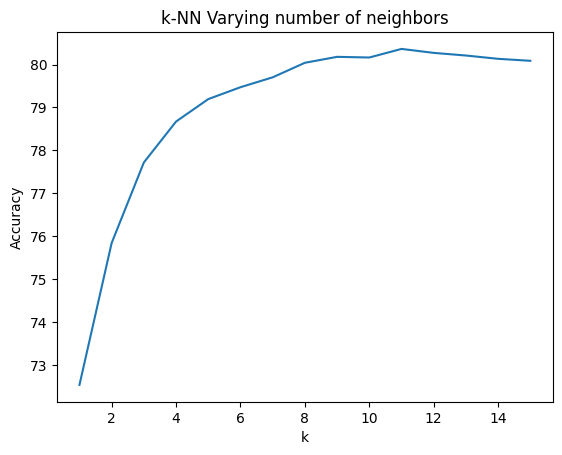

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 16), final_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.show()

In [ ]:
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)

10


In [ ]:
df_test = df

In [ ]:
knn_op = KNeighborsClassifier(n_neighbors = optimal_k)
knn_op.fit(X_train, y_train)
pred_op = knn_op.predict(X_test)
# print(pred_op)

### Step 4: Initializing k-NN Classifier
We need to initialize the k-NN classifier with a specific value of 'k'. Let's start with `k=3`.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance')

### Step 5: Training the Classifier
Now, we train our classifier using the training data.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

### Step 6: Making Predictions
We use our trained model to make predictions on the test dataset.

In [ ]:
y_pred = knn.predict(X_test)

### Step 7: Evaluating the Model
Finally, we evaluate our model's performance.

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[4397  545]
 [ 966  605]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4942
           1       0.53      0.39      0.44      1571

    accuracy                           0.77      6513
   macro avg       0.67      0.64      0.65      6513
weighted avg       0.75      0.77      0.75      6513



### Step 8: Experimenting with Different 'k' Values
It's a good practice to experiment with different 'k' values to see which gives the best performance.

In [ ]:
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(np.mean(y_pred == y_test))

# Plotting accuracies vs k values

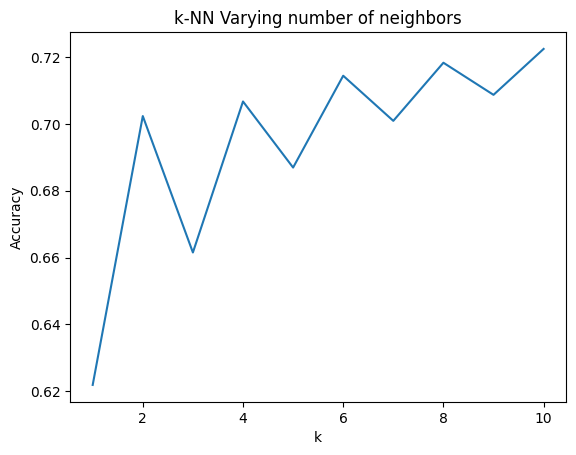

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.show()